In [1]:
#Import pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reads the file and prints the csv column and info
earthquakeData= pd.read_csv('all_month.csv')
earthquakeData.head()



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-02-11T17:55:22.563Z,63.134200,-151.509700,0.000000,2.30,ml,NaN,NaN,NaN,0.90,...,2021-02-11T18:06:20.095Z,"46 km SSE of Denali National Park, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
1,2021-02-11T17:54:28.390Z,19.188168,-155.461670,34.619999,1.90,md,39.0,148.0,NaN,0.13,...,2021-02-11T17:58:04.870Z,"2 km SE of Pāhala, Hawaii",earthquake,0.63,0.75,1.840,10.0,automatic,hv,hv
2,2021-02-11T17:41:05.500Z,36.067500,-117.882000,1.610000,0.86,ml,9.0,196.0,0.054600,0.07,...,2021-02-11T17:44:44.723Z,"6km ENE of Coso Junction, CA",earthquake,0.30,0.22,0.176,10.0,automatic,ci,ci
3,2021-02-11T17:32:20.400Z,38.824501,-122.856003,1.940000,1.34,md,30.0,84.0,0.003115,0.03,...,2021-02-11T17:57:07.561Z,"10km WNW of The Geysers, CA",earthquake,0.22,0.34,0.050,6.0,automatic,nc,nc
4,2021-02-11T17:28:04.060Z,17.939800,-66.949100,6.000000,1.49,md,4.0,285.0,0.099600,0.03,...,2021-02-11T17:55:05.369Z,Puerto Rico region,earthquake,0.57,1.43,0.050,3.0,reviewed,pr,pr


In [3]:
#Stores magnitude data in a list
magnitudeData = earthquakeData["mag"]

#stores the variable according to basic stats on magnitude
minimum = min(magnitudeData)
maximum = max(magnitudeData)
median = np.median(magnitudeData)
mean = np.mean(magnitudeData)

percentile75th = earthquakeData["mag"].quantile(0.75)
percentile25th = earthquakeData["mag"].quantile(0.25)


In [4]:
#Print the minimum, maximum, median, mean, 25th and 75th percentile.
print("Min = ", minimum)
print("Max = ", maximum)
print("Median = ", median)
print("Mean =", mean)
print("25th Percentile = ", percentile25th)
print("75th Percentile = ", percentile75th)

Min =  -1.31
Max =  7.7
Median =  nan
Mean = 1.6649625935854808
25th Percentile =  0.9
75th Percentile =  2.07


In [6]:
#Finds the average magnitude in ml
average_list= earthquakeData.loc[earthquakeData['magType'] == 'ml']

#Prints the average in the list in ml
average = average_list["mag"].mean()
print("Average magnitude in ml: ", average)

Average magnitude in ml:  1.3647376834762386


In [8]:
# Find the date and Location of the Largest magnitude
largest_magnitude_earthquakeData = earthquakeData[earthquakeData["mag"] == maximum]

#Variable for data and location
magnitude_date = list(largest_magnitude_earthquakeData["updated"])[0]
magnitude_location = list(largest_magnitude_earthquakeData["magSource"])[0]
                      
#Prints Data and location of max magnitude   
print("Date of maximum magnitude: ", magnitude_date)
print("Location of maximum magnitude: ", magnitude_location)

Date of maximum magnitude:  2021-02-11T13:29:22.604Z
Location of maximum magnitude:  us


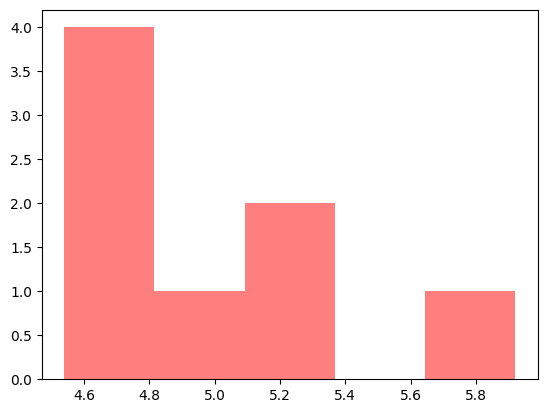

In [12]:
#Plot earthquakes mag 4.5+ in a histogram
#list magnitudes greater then or equal to 4.5 
earthquake_45 = list(earthquakeData[earthquakeData["magError"] >= 4.5]["magError"])

#prints and shows histogram chart
earthquake_histogram = 5
n, bins, patches = plt.hist(earthquake_45, earthquake_histogram, color= 'red', alpha=0.5)
plt.show()

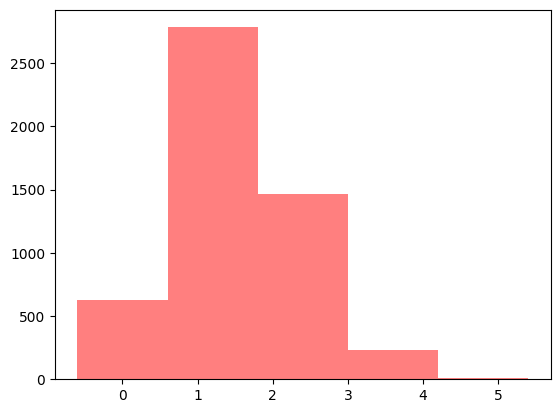

In [13]:
#PLot a histogram Of only earthquakes that occurred tn the US
states = ["al", "ak", "az", "ar", "ca", "co", "ct", "de", "dc", "fl", "ga", "gu", "hi", "id", "il", "in", "ia", "ks", "ky", "la", "me", "md", "ma", "mi", "mn", "ms", "mo", "mt", "nv", "nh", "nj", "nm", "ny", "nc", "nd", "cm", "oh", "ok", "or", "pa", "pr", "ri", "sc", "sd", "tn", "tx", "tt", "ut", "vt", "vi", "wa", "wv", "wi", "wy"]

#Empty List
magnitudeData = list()

#for loop to search for us states in states name 
for state in states:

    #list for search for location in data
    magnitude = list(earthquakeData[earthquakeData["locationSource"] == state]["mag"])
    
    #if the length of the list is not 0 then: 
    if(len(magnitude) !=0):
        
        #append or attaches to the first data point
        magnitudeData.extend(magnitude)
        
# pLotting the histogram from the magnitude data
earthquake_histogram = 5
n, bins, patches = plt.hist(magnitudeData, earthquake_histogram, color= 'red', alpha=0.5)
plt.show()